In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Topic_Survey_Assignment.csv")
df.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


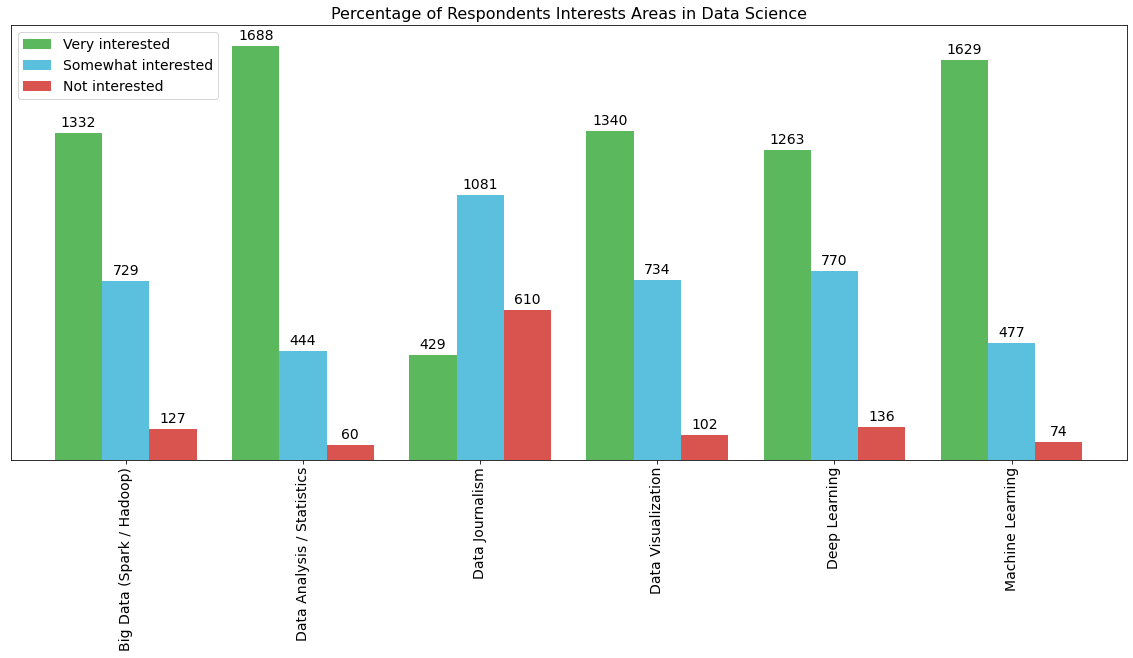

In [8]:
ax = df.plot(kind="bar",
             figsize=(20,8),
             rot=90,color=["#5cb85c","#5bc0de","#d9534f"],
             width=0.8,fontsize=14)
ax.set_title("Percentage of Respondents Interests Areas in Data Science",fontsize=16)
ax.set_facecolor("white")
ax.legend(fontsize=14,facecolor="white")
ax.get_yaxis().set_visible(False)
for p in ax.patches:
                 ax.annotate(np.round(p.get_height(),decimals=2),
                            (p.get_x()+p.get_width()/2.,p.get_height()),
                            ha="center",
                            va="center",
                            xytext=(0,10),
                            textcoords="offset points",
                            fontsize=14
                            )
plt.show()
                 

In [12]:
# import the data
sf_raw=pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [13]:
sf_s=sf_raw.groupby(['PdDistrict'], sort=0).apply(lambda g: pd.Series({\
                                                                 'Count': g.IncidntNum.count(),\
                                                                 }))

In [14]:

# reset index
sf_s.reset_index(level=0, inplace=True)

In [15]:
sf_s

,PdDistrict,Count
0,SOUTHERN,28445
1,BAYVIEW,14303
2,TENDERLOIN,9942
3,MISSION,19503
4,NORTHERN,20100
5,TARAVAL,11325
6,INGLESIDE,11594
7,CENTRAL,17666
8,RICHMOND,8922
9,PARK,8699


In [16]:
sf=sf_s.rename(columns={'PdDistrict':'Neighborhood'})

In [17]:
sf


,Neighborhood,Count
0,SOUTHERN,28445
1,BAYVIEW,14303
2,TENDERLOIN,9942
3,MISSION,19503
4,NORTHERN,20100
5,TARAVAL,11325
6,INGLESIDE,11594
7,CENTRAL,17666
8,RICHMOND,8922
9,PARK,8699


In [18]:

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [20]:
# Read the json file
sf_geo = r'san-francisco.geojson' # geojson file

In [21]:
world_map = folium.Map()

# display world map
world_map

In [22]:
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [23]:
sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

In [24]:
# generate choropleth map using the total crime numbers of each neighborhood of san francisco from 1980 to 2013
sf_map.choropleth(
    geo_data=sf_geo,
    data=sf,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Numbers of Each Neighborhood in San Francisco'
)

# display map
sf_map

FileNotFoundError: [Errno 2] No such file or directory: 'san-francisco.geojson'